In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [7]:
iris = load_iris()
X = iris.data[:,:2]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [8]:
import pandas as pd
pd.DataFrame(X, columns=iris.feature_names[:2])

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)


DecisionTreeClassifier()

In [11]:
from sklearn.metrics import accuracy_score
y_pred = dtc.predict(X_test)
accuracy_score(y_test, y_pred)

0.7333333333333333

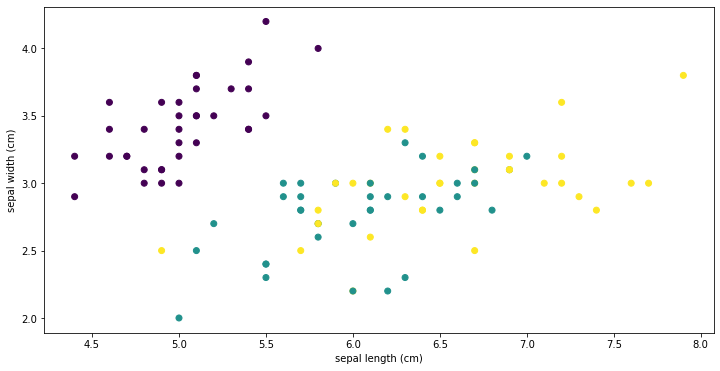

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

In [46]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [3,5,7,20]}
gs_inst = GridSearchCV(dtc, param_grid=param_grid, cv=5)
gs_inst.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 20]})

In [48]:
means = gs_inst.cv_results_['mean_test_score']
stds = gs_inst.cv_results_['std_test_score']
params = gs_inst.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print("mean: %0.5f, std: %0.5f, params: %r" % (mean, std, param))

mean: 0.65714, std: 0.06317, params: {'criterion': 'gini', 'max_depth': 3}
mean: 0.64762, std: 0.07737, params: {'criterion': 'gini', 'max_depth': 5}
mean: 0.66667, std: 0.07377, params: {'criterion': 'gini', 'max_depth': 7}
mean: 0.66667, std: 0.07968, params: {'criterion': 'gini', 'max_depth': 20}
mean: 0.68571, std: 0.02333, params: {'criterion': 'entropy', 'max_depth': 3}
mean: 0.69524, std: 0.06459, params: {'criterion': 'entropy', 'max_depth': 5}
mean: 0.62857, std: 0.07619, params: {'criterion': 'entropy', 'max_depth': 7}
mean: 0.65714, std: 0.08193, params: {'criterion': 'entropy', 'max_depth': 20}


In [35]:
import numpy as np

grid_interval = 0.02

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

xmin, xmax = np.percentile(X[:, 0], [0, 100])
ymin, ymax = np.percentile(X[:, 1], [0, 100])

xmin_plot, xmax_plot = xmin - .5, xmax + .5
ymin_plot, ymax_plot = ymin - .5, ymax + .5

xx, yy = np.meshgrid(np.arange(xmin_plot, xmax_plot, grid_interval),np.arange(ymin_plot, ymax_plot, grid_interval))



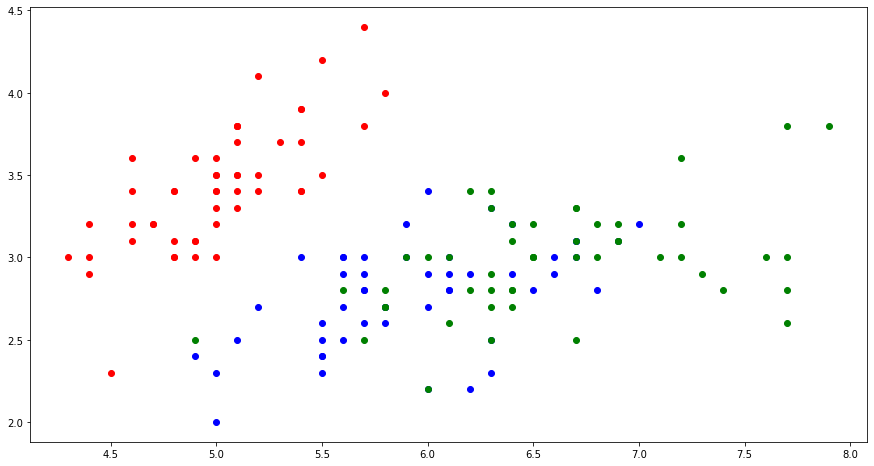

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

X_0 = X[y == 0]
X_1 = X[y == 1]
X_2 = X[y == 2]

plt.figure(figsize=(15,8)) #change figure-size for easier viewing
plt.scatter(X_0[:,0],X_0[:,1], color = 'red')
plt.scatter(X_1[:,0],X_1[:,1], color = 'blue')
plt.scatter(X_2[:,0],X_2[:,1], color = 'green')

plt.show()

In [40]:
test_preds = gs_inst.best_estimator_.predict(np.array(list(zip(xx.ravel(), yy.ravel()))))


Text(0, 0.5, 'sepal width (cm)')

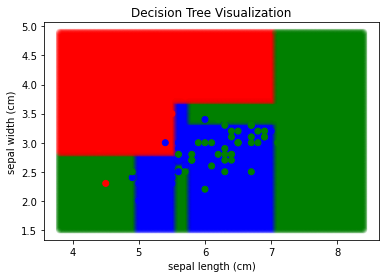

In [41]:
colors = np.array(['r', 'b','g'])
plt.scatter(xx.ravel(), yy.ravel(), color=colors[test_preds], alpha=0.15)
plt.scatter(X[:, 0], X[:, 1], color=colors[y])
plt.title("Decision Tree Visualization")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

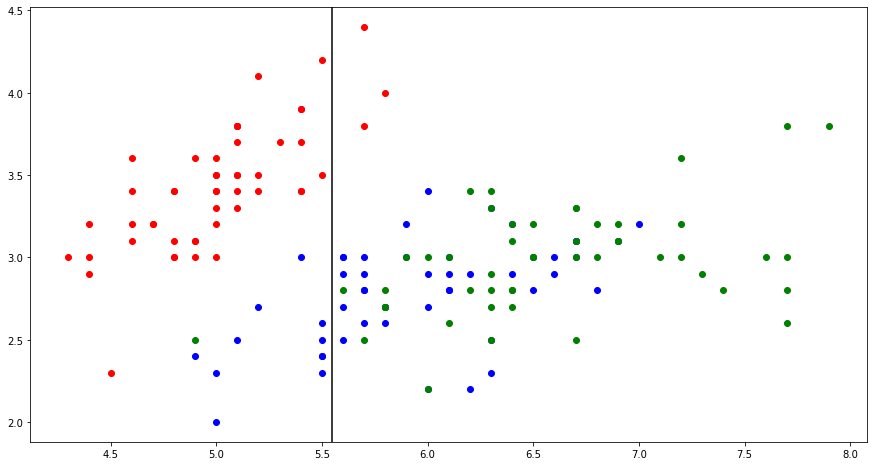

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

X_0 = X[y == 0]
X_1 = X[y == 1]
X_2 = X[y == 2]

plt.figure(figsize=(15,8)) #change figure-size for easier viewing
plt.scatter(X_0[:,0],X_0[:,1], color = 'red')
plt.scatter(X_1[:,0],X_1[:,1], color = 'blue')
plt.scatter(X_2[:,0],X_2[:,1], color = 'green')

plt.axvline(x=5.55, color='black')

plt.show()



In [49]:
from sklearn import tree
from six import StringIO
import pydot
from IPython.display import Image